In [9]:
import pydicom
import pymedphys
from dicompylercore import dicomparser
import numpy as np
import matplotlib.pyplot as plt
import csv
import os

In [10]:
dose_path = '/Users/paritt.w/Desktop/Thesis_local/paper_dose'

dir = os.listdir(dose_path)
dir = dir[:]
dir

['.DS_Store', 'case 60']

In [11]:
dose_path = '/Users/paritt.w/Desktop/Thesis_local/paper_dose'

dir = os.listdir(dose_path)
dir = dir[1:]
print(dir)

# Create a CSV file
report_dir = '/Users/paritt.w/Desktop/Thesis_local/gamma_report'

if not os.path.exists(report_dir):
        os.makedirs(report_dir)

csv_file = os.path.join(report_dir, 'Gamma_global_nl.csv')
with open(csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['case', 'model', 'Low dose cutoff','3%/2mm', '2%/2mm'])

for i in range(len(dir)):
    case_path = os.path.join(dose_path , dir[i])
    case = dir[i]

    ct_path = os.path.join(case_path , 'CT')
    
    if case != 'case 60':
        cbct_path = os.path.join(case_path , 'CBCT')
        sct_CCB_path = os.path.join(case_path , 'CCB')
        sct_SCB_path = os.path.join(case_path , 'SCB')
    if case != 'case 22':
        sct_CMR_path = os.path.join(case_path , 'CMR')
        sct_SMR_path = os.path.join(case_path , 'SMR')

    ct_dose_path = os.path.join(ct_path , os.listdir(ct_path)[0])
    if case != 'case 60':
        cbct_dose_path = os.path.join(cbct_path , os.listdir(cbct_path)[0])
        sct_CCB_dose_path = os.path.join(sct_CCB_path , os.listdir(sct_CCB_path)[0])
        sct_SCB_dose_path = os.path.join(sct_SCB_path , os.listdir(sct_SCB_path)[0])
    if case != 'case 22':
        sct_CMR_dose_path = os.path.join(sct_CMR_path , os.listdir(sct_CMR_path)[0])
        sct_SMR_dose_path = os.path.join(sct_SMR_path , os.listdir(sct_SMR_path)[0])

    if case == 'case 22':
        evaluation_name = ['CBCT', 'CCB', 'SCB']
        evaluation_path = [cbct_dose_path, sct_CCB_dose_path, sct_SCB_dose_path]
    if case == 'case 60':
        evaluation_name = ['CMR', 'SMR']
        evaluation_path = [sct_CMR_dose_path, sct_SMR_dose_path]
    else:
        evaluation_name = ['CBCT', 'CCB', 'SCB', 'CMR', 'SMR']
        evaluation_path = [cbct_dose_path, sct_CCB_dose_path, sct_SCB_dose_path, sct_CMR_dose_path, sct_SMR_dose_path]

    #low_dose_cutoff = [90, 50, 10]
    low_dose_cutoff = [10]

    for cut_off in low_dose_cutoff:
        for c in range(len(evaluation_path)):

                # 3%/2mm
                dose_percent_threshold = 3
                distance_mm_threshold = 2

                reference = pydicom.dcmread(ct_dose_path)
                evaluation = pydicom.dcmread(evaluation_path[c])

                axes_reference, dose_reference = pymedphys.dicom.zyx_and_dose_from_dataset(reference)
                axes_evaluation, dose_evaluation = pymedphys.dicom.zyx_and_dose_from_dataset(evaluation)

                print(f'Calculate 3%/2mm gamma for {case} {evaluation_name[c]} low dose cutoff {cut_off}%...')

                gamma_32 = pymedphys.gamma(axes_reference, dose_reference, 
                                           axes_evaluation, dose_evaluation, 
                                           dose_percent_threshold, distance_mm_threshold,
                                           local_gamma=False, lower_percent_dose_cutoff=cut_off)
                
                valid_gamma_32 = gamma_32[~np.isnan(gamma_32)]
                gpr_32 = len(valid_gamma_32[valid_gamma_32 <= 1]) / len(valid_gamma_32) * 100

                print(f"GPR 3%/2mm for {case} {evaluation_name[c]} = {round(gpr_32,2)}%")

                # 2%/2mm
                dose_percent_threshold = 2
                distance_mm_threshold = 2

                reference = pydicom.dcmread(ct_dose_path)
                evaluation = pydicom.dcmread(evaluation_path[c])

                axes_reference, dose_reference = pymedphys.dicom.zyx_and_dose_from_dataset(reference)
                axes_evaluation, dose_evaluation = pymedphys.dicom.zyx_and_dose_from_dataset(evaluation)

                print(f'Calculate 2%/2mm gamma for {case} {evaluation_name[c]} low dose cutoff {cut_off}%...')

                gamma_22 = pymedphys.gamma(axes_reference, dose_reference, 
                                           axes_evaluation, dose_evaluation, 
                                           dose_percent_threshold, distance_mm_threshold,
                                           local_gamma=False, lower_percent_dose_cutoff=cut_off)
                
                valid_gamma_22 = gamma_22[~np.isnan(gamma_22)]
                gpr_22 = len(valid_gamma_22[valid_gamma_22 <= 1]) / len(valid_gamma_22) * 100
                
                print(f"GPR 2%/2mm for {case} {evaluation_name[c]} = {round(gpr_22,2)}%")

                # Write CSV
                with open(csv_file, mode='a', newline='') as file:
                                writer = csv.writer(file)
                                writer.writerow([case, evaluation_name[c], cut_off, round(gpr_32,2), round(gpr_22,2)])
                
                print(f'Write CSV for {case} {evaluation_name[c]}')

                #plt.imshow(gamma_22[22], cmap='jet', vmin=0, vmax=1.2)
                #plt.colorbar()
                #plt.show()

['case 60']
Calculate 3%/2mm gamma for case 60 CMR low dose cutoff 10%...
GPR 3%/2mm for case 60 CMR = 91.34%
Calculate 2%/2mm gamma for case 60 CMR low dose cutoff 10%...
GPR 2%/2mm for case 60 CMR = 90.0%
Write CSV for case 60 CMR
Calculate 3%/2mm gamma for case 60 SMR low dose cutoff 10%...
GPR 3%/2mm for case 60 SMR = 91.89%
Calculate 2%/2mm gamma for case 60 SMR low dose cutoff 10%...
GPR 2%/2mm for case 60 SMR = 90.39%
Write CSV for case 60 SMR


In [22]:
c = 11
ct_dose_path = f'/Users/paritt.w/Desktop/Thesis_local/paper_dose/case {c}/CT'
ct_dose_path = os.path.join(ct_dose_path , os.listdir(ct_dose_path)[0])
cbct_dose_path = f'/Users/paritt.w/Desktop/Thesis_local/paper_dose/case {c}/CBCT'
cbct_dose_path = os.path.join(cbct_dose_path , os.listdir(cbct_dose_path)[0])
ccb_dose_path = f'/Users/paritt.w/Desktop/Thesis_local/paper_dose/case {c}/CCB'
ccb_dose_path = os.path.join(ccb_dose_path , os.listdir(ccb_dose_path)[0])
scb_dose_path = f'/Users/paritt.w/Desktop/Thesis_local/paper_dose/case {c}/SCB'
scb_dose_path = os.path.join(scb_dose_path , os.listdir(scb_dose_path)[0])
cmr_dose_path = f'/Users/paritt.w/Desktop/Thesis_local/paper_dose/case {c}/CMR'
cmr_dose_path = os.path.join(cmr_dose_path , os.listdir(cmr_dose_path)[0])
smr_dose_path = f'/Users/paritt.w/Desktop/Thesis_local/paper_dose/case {c}/SMR'
smr_dose_path = os.path.join(smr_dose_path , os.listdir(smr_dose_path)[0])

In [8]:
c = 42
ct_dose_path = f'/Users/paritt.w/Desktop/Thesis_local/thesis_dose/case {c}/CT'
ct_dose_path = os.path.join(ct_dose_path , os.listdir(ct_dose_path)[0])
cbct_dose_path = f'/Users/paritt.w/Desktop/Thesis_local/thesis_dose/case {c}/CBCT'
cbct_dose_path = os.path.join(cbct_dose_path , os.listdir(cbct_dose_path)[0])
ccb_dose_path = f'/Users/paritt.w/Desktop/Thesis_local/thesis_dose/case {c}/CCB'
ccb_dose_path = os.path.join(ccb_dose_path , os.listdir(ccb_dose_path)[0])
scb_dose_path = f'/Users/paritt.w/Desktop/Thesis_local/thesis_dose/case {c}/SCB'
scb_dose_path = os.path.join(scb_dose_path , os.listdir(scb_dose_path)[0])
cmr_dose_path = f'/Users/paritt.w/Desktop/Thesis_local/thesis_dose/case {c}/CMR'
cmr_dose_path = os.path.join(cmr_dose_path , os.listdir(cmr_dose_path)[0])
smr_dose_path = f'/Users/paritt.w/Desktop/Thesis_local/thesis_dose/case {c}/SMR'
smr_dose_path = os.path.join(smr_dose_path , os.listdir(smr_dose_path)[0])

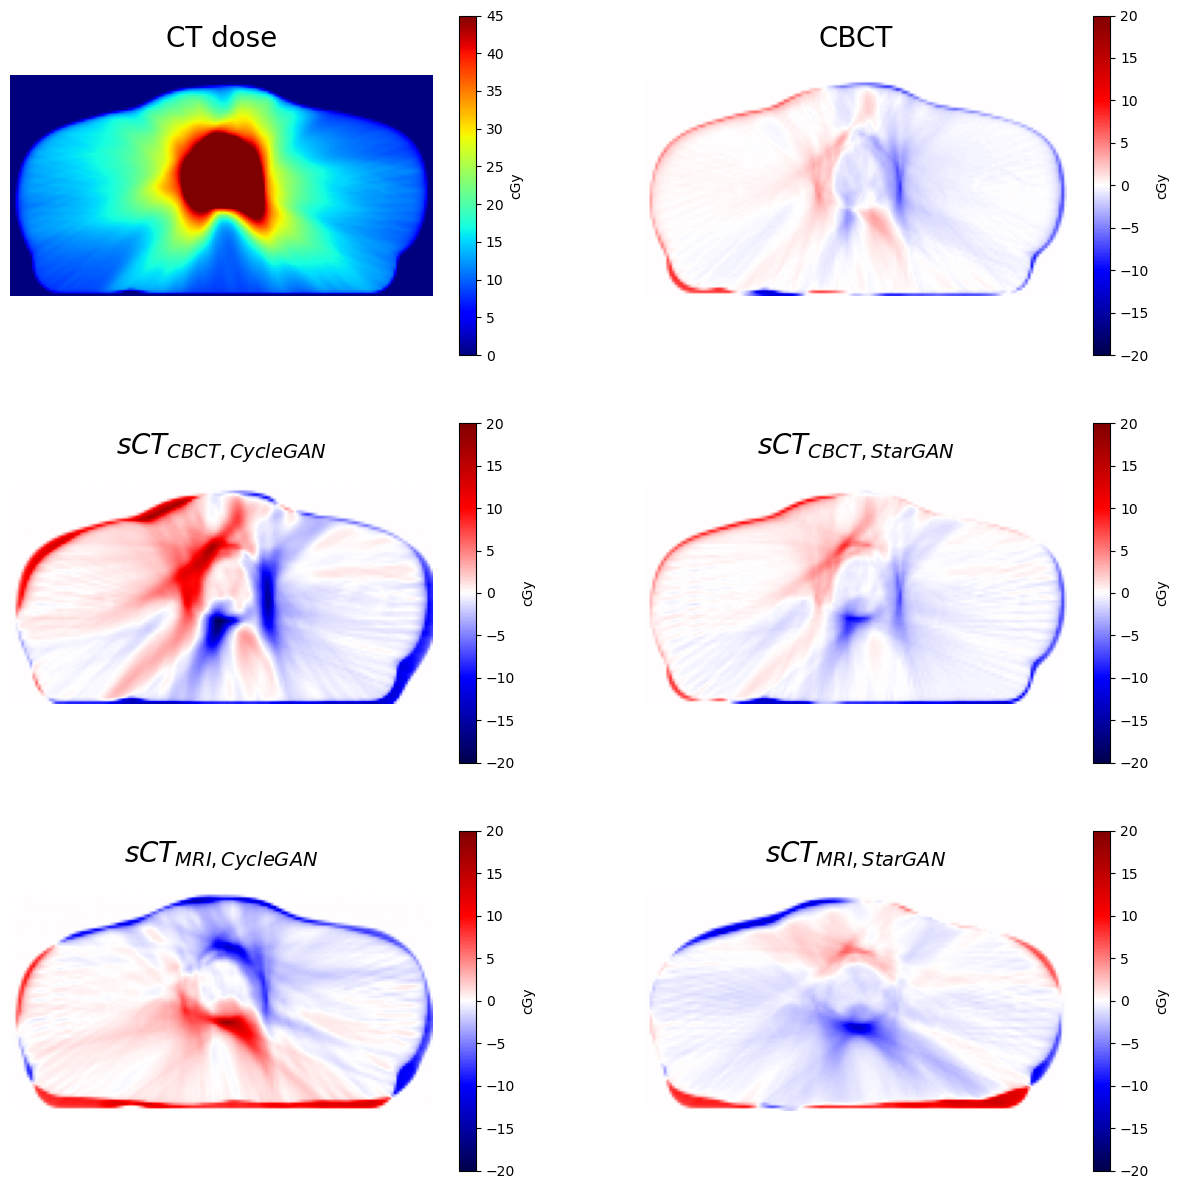

In [23]:
reference = pydicom.dcmread(ct_dose_path)
cbct = pydicom.dcmread(cbct_dose_path)
cmr = pydicom.dcmread(cmr_dose_path)
smr = pydicom.dcmread(smr_dose_path)

reference_pix_shape = reference.pixel_array.shape
cbct_shape = cbct.pixel_array.shape
cmr_shape = cmr.pixel_array.shape
smr_shape = smr.pixel_array.shape

x = min([reference_pix_shape[1], cbct_shape[1], cmr_shape[1], smr_shape[1]])
y = min([reference_pix_shape[2], cbct_shape[2], cmr_shape[2], smr_shape[2]])


reference = reference.pixel_array[:,:x,:y]*reference.DoseGridScaling

cbct = cbct.pixel_array[:,:x,:y]*cbct.DoseGridScaling
cbct_diff = reference - cbct

ccb = pydicom.dcmread(ccb_dose_path)
ccb = ccb.pixel_array[:,:x,:y]*ccb.DoseGridScaling
ccb_diff = reference - ccb

scb = pydicom.dcmread(scb_dose_path)
scb = scb.pixel_array[:,:x,:y]*scb.DoseGridScaling
scb_diff = reference - scb

cmr = pydicom.dcmread(cmr_dose_path)
cmr = cmr.pixel_array[:,:x,:y]*cmr.DoseGridScaling
cmr_diff = reference - cmr

smr = pydicom.dcmread(smr_dose_path)
smr = smr.pixel_array[:,:x,:y]*smr.DoseGridScaling
smr_diff = reference - smr

s = 22
fig, axs = plt.subplots(3, 2, figsize=(15, 15), sharex=True, sharey=True)
data_list = [reference[s], cbct_diff[s], ccb_diff[s], scb_diff[s], cmr_diff[s],smr_diff[s]]
titles = ['CT dose', f'CBCT', '$sCT_{CBCT,CycleGAN}$', '$sCT_{CBCT,StarGAN}$', '$sCT_{MRI,CycleGAN}$', '$sCT_{MRI,StarGAN}$']
for i, (data, title, ax) in enumerate(zip(data_list, titles, axs.flat)):
    if i < 1:
        im = ax.imshow(data, cmap='jet', vmin=0, vmax=45)
    else:
        im = ax.imshow(data, cmap='seismic', vmin=-20, vmax=20)
    if i < 6:
        ax.set_title(title, fontsize=20, pad=20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(False)
    ax.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
    cbar = fig.colorbar(im, label='cGy', location='right', use_gridspec=False)
plt.show()

In [24]:
dose_percent_threshold = 2
distance_mm_threshold = 2
cutoff_list = [90, 50, 10]
data_list = []
s = 23
reference = pydicom.dcmread(ct_dose_path)
axes_reference, dose_reference = pymedphys.dicom.zyx_and_dose_from_dataset(reference)

for cutoff in cutoff_list:
    print(f'Cutoff {cutoff}')
    print(f'Calculate 2%/2mm gamma...')
    evaluation = pydicom.dcmread(cbct_dose_path)
    axes_evaluation, dose_evaluation = pymedphys.dicom.zyx_and_dose_from_dataset(evaluation)
    gamma_cbct = pymedphys.gamma(axes_reference, dose_reference, 
                            axes_evaluation, dose_evaluation, 
                            dose_percent_threshold, distance_mm_threshold,
                            local_gamma=False, lower_percent_dose_cutoff=cutoff)
    valid_gamma_cbct = gamma_cbct[~np.isnan(gamma_cbct)]
    gpr_32 = len(valid_gamma_cbct[valid_gamma_cbct <= 1]) / len(valid_gamma_cbct) * 100
    print(f"CBCT= {round(gpr_32,2)}%")
    evaluation = pydicom.dcmread(ccb_dose_path)
    axes_evaluation, dose_evaluation = pymedphys.dicom.zyx_and_dose_from_dataset(evaluation)
    #print(f'Calculate 2%/2mm gamma...')
    gamma_ccb = pymedphys.gamma(axes_reference, dose_reference, 
                            axes_evaluation, dose_evaluation, 
                            dose_percent_threshold, distance_mm_threshold,
                            local_gamma=False, lower_percent_dose_cutoff=cutoff)
    valid_gamma_ccb = gamma_ccb[~np.isnan(gamma_ccb)]
    gpr_32 = len(valid_gamma_ccb[valid_gamma_ccb <= 1]) / len(valid_gamma_ccb) * 100
    print(f"CCB= {round(gpr_32,2)}%")
    evaluation = pydicom.dcmread(cmr_dose_path)
    axes_evaluation, dose_evaluation = pymedphys.dicom.zyx_and_dose_from_dataset(evaluation)
    #print(f'Calculate 2%/2mm gamma...')
    gamma_cmr = pymedphys.gamma(axes_reference, dose_reference, 
                            axes_evaluation, dose_evaluation, 
                            dose_percent_threshold, distance_mm_threshold,
                            local_gamma=False, lower_percent_dose_cutoff=cutoff)
    valid_gamma_cmr = gamma_cmr[~np.isnan(gamma_cmr)]
    gpr_32 = len(valid_gamma_cmr[valid_gamma_cmr <= 1]) / len(valid_gamma_cmr) * 100
    print(f"CMR= {round(gpr_32,2)}%")
    evaluation = pydicom.dcmread(scb_dose_path)
    axes_evaluation, dose_evaluation = pymedphys.dicom.zyx_and_dose_from_dataset(evaluation)
    #print(f'Calculate 2%/2mm gamma...')
    gamma_scb = pymedphys.gamma(axes_reference, dose_reference, 
                            axes_evaluation, dose_evaluation, 
                            dose_percent_threshold, distance_mm_threshold,
                            local_gamma=False, lower_percent_dose_cutoff=cutoff)
    valid_gamma_scb = gamma_scb[~np.isnan(gamma_scb)]
    gpr_32 = len(valid_gamma_scb[valid_gamma_scb <= 1]) / len(valid_gamma_scb) * 100
    print(f"SCB= {round(gpr_32,2)}%")
    evaluation = pydicom.dcmread(smr_dose_path)
    axes_evaluation, dose_evaluation = pymedphys.dicom.zyx_and_dose_from_dataset(evaluation)
    #print(f'Calculate 2%/2mm gamma...')
    gamma_smr = pymedphys.gamma(axes_reference, dose_reference, 
                            axes_evaluation, dose_evaluation, 
                            dose_percent_threshold, distance_mm_threshold,
                            local_gamma=False, lower_percent_dose_cutoff=cutoff)
    valid_gamma_smr = gamma_smr[~np.isnan(gamma_smr)]
    gpr_32 = len(valid_gamma_smr[valid_gamma_smr <= 1]) / len(valid_gamma_smr) * 100
    print(f"SMR= {round(gpr_32,2)}%")

    data_list.append(gamma_cbct[s])
    data_list.append(gamma_ccb[s])
    data_list.append(gamma_scb[s])
    data_list.append(gamma_cmr[s])
    data_list.append(gamma_smr[s])

Cutoff 90
Calculate 2%/2mm gamma...
CBCT= 97.56%
CCB= 98.96%
CMR= 100.0%
SCB= 100.0%
SMR= 75.84%
Cutoff 50
Calculate 2%/2mm gamma...
CBCT= 99.28%
CCB= 99.69%
CMR= 100.0%
SCB= 100.0%
SMR= 85.39%
Cutoff 10
Calculate 2%/2mm gamma...
CBCT= 99.56%
CCB= 98.8%
CMR= 97.71%
SCB= 99.7%
SMR= 93.31%


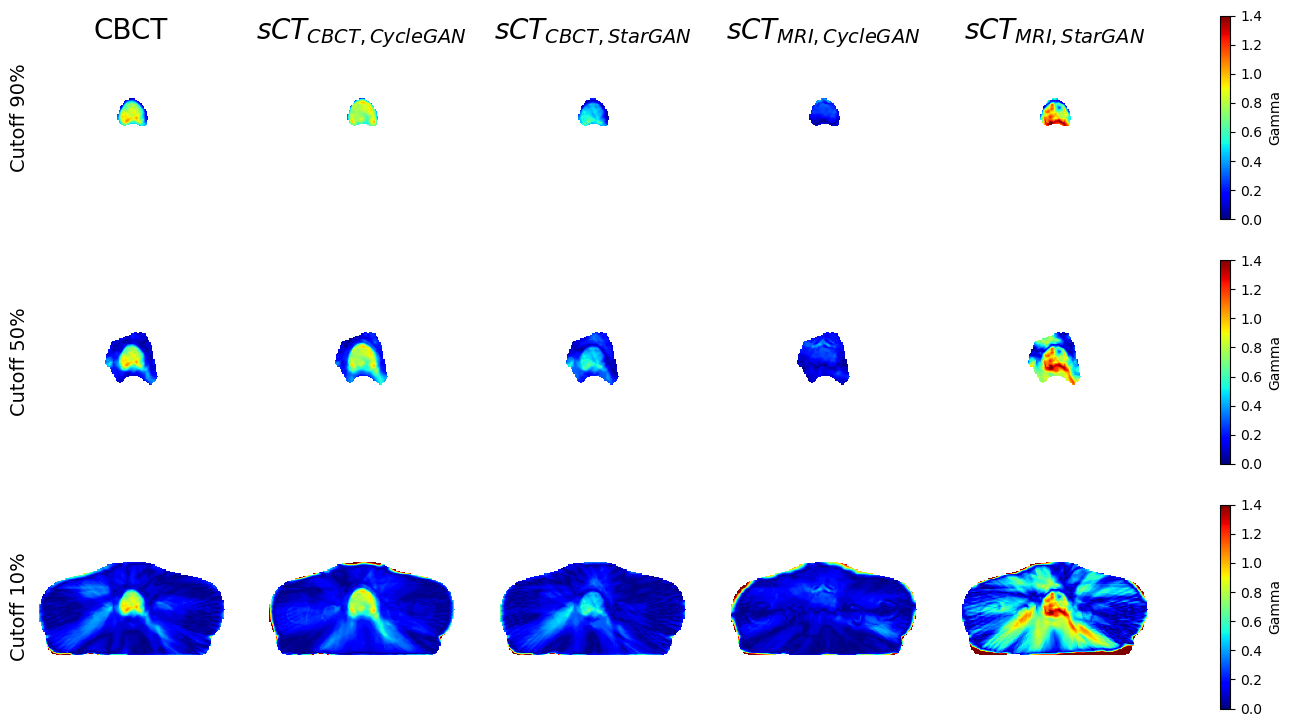

In [25]:
fig, axs = plt.subplots(3, 5, figsize=(18, 9), sharex=True, sharey=True)
#data_list = [gamma_cbct[26], gamma_ccb[26], gamma_cmr[26], gamma_scb[26], gamma_smr[26]]
titles = [f'CBCT', '$sCT_{CBCT,CycleGAN}$', '$sCT_{CBCT,StarGAN}$', '$sCT_{MRI,CycleGAN}$',  '$sCT_{MRI,StarGAN}$',
            f'CBCT', f'CycleCBCT', f'CycleMRI', f'StarCBCT', f'StarMRI',
            f'CBCT', f'CycleCBCT', f'CycleMRI', f'StarCBCT', f'StarMRI',]
for i, (data, title, ax) in enumerate(zip(data_list, titles, axs.flat)):
    im = ax.imshow(data, cmap='jet', vmin=0, vmax=1.4)
    if i < 5:
        ax.set_title(title, fontsize=20, pad=20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(False)
    ax.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
    if i ==0:
        ax.set_ylabel("Cutoff 90%", fontsize=14)
    if i ==5:
        ax.set_ylabel("Cutoff 50%", fontsize=14)    
    if i ==10:
        ax.set_ylabel("Cutoff 10%", fontsize=14) 
    if i % 5 == 1:
        cbar = fig.colorbar(im, ax=axs[i // 5,:], label='Gamma', location='right', use_gridspec=False)
        cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
plt.show()